### 데이터 시각화 연습문제 (2) - 서브플롯

###### 아래의 데이터는 2020년 02월 05일부터 2023년 05월 31일까지 서울시와 전국에 대한 코로나19의 누적 확진자, 일일 확진자, 누적 사망자에 대한 조사자료 일부이다.

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_excel, pivot_table

In [120]:
plt.rcParams["font.family"] = 'Malgun Gothic'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [121]:
df = read_excel("https://data.hossam.kr/D01/covid19.xlsx")
df

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
0,2023-05-31,6204277,5987.0,6492,31703511.0,24411.0,34784
1,2023-05-30,6198290,3326.0,6486,31679100.0,13529.0,34767
2,2023-05-29,6194964,1393.0,6485,31665571.0,6868.0,34760
3,2023-05-28,6194964,1393.0,6485,31665571.0,6868.0,34760
4,2023-05-27,6191196,4078.0,6485,31647238.0,17796.0,34784
...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,0,27.0,0.0,0
1208,2020-02-08,10,0.0,0,24.0,0.0,0
1209,2020-02-07,10,0.0,0,24.0,0.0,0
1210,2020-02-06,11,0.0,0,24.0,0.0,0


In [122]:
df['서울시 기준일'] = df['서울시 기준일'].astype('str')
df['서울시 기준일'] = df['서울시 기준일'].str.replace("-","")

# day = int(input("원하는 날짜를 입력하세요ex)20230531 : "))
# df.loc[df['서울시 기준일'] == str(day)]
day = input("원하는 날짜를 입력하세요ex)20230531 : ")
date = []
for i in df['서울시 기준일']:
    date.append(i)
print(date[date.index(day)])

20220201


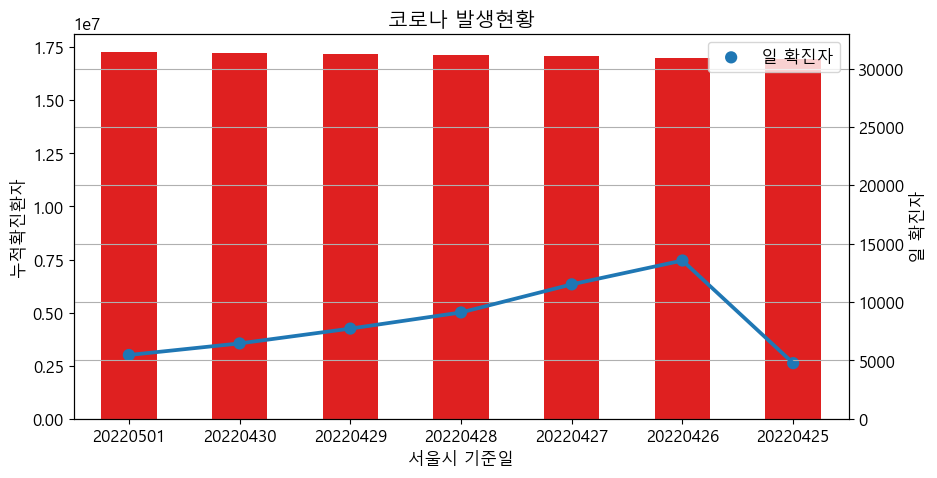

In [131]:
fig, ax1 = plt.subplots(1, 1)
day = input("원하는 날짜를 입력하세요ex)20230531 : ")
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
bar = sns.barplot(data=df, x=df['서울시 기준일'][date.index(day):date.index(day)+7], y='전국 확진', color='red', ax=ax1, width=0.5, label='누적확진자')

ax2 = ax1.twinx()
sns.pointplot(data=df, x=df['서울시 기준일'][date.index(day):date.index(day)+7], y='서울시 일일 확진', ax=ax2, label='일 확진자')

ax1.set_ylabel("누적확진환자")
plt.title('코로나 발생현황')   # 그래프 제목
# plt.xlabel("년도")      # x축 제목
ax2.set_ylabel("일 확진자")   # y축 제목
plt.ylim([0, 33000])
plt.grid()
plt.legend()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료
